/var/folders/pj/kpd4vj4j6_b_l77b3ry75hp40000gn/T/ipykernel_45807/12296870.py:6: DtypeWarning: Columns (14,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_xgb = pd.read_csv('data/raw/BIT_AI_assignment_data.csv')


Fitting XGBRegressor...
Fit complete. Performance: 0.8331047821918521
Feature importance plot saved as 'xgb_raw_feature_importance.png'

Top 10 Features:
                      Feature  Importance
15               Machine Size    0.187452
19  Product Group Description    0.154921
21                  Enclosure    0.080799
41            Hydraulics Flow    0.069599
16  Product Class Description    0.067582
6                   Year Made    0.065219
34                     Ripper    0.037301
12      Secondary Description    0.034519
42                Tupper Type    0.032054
18              Product Group    0.025200


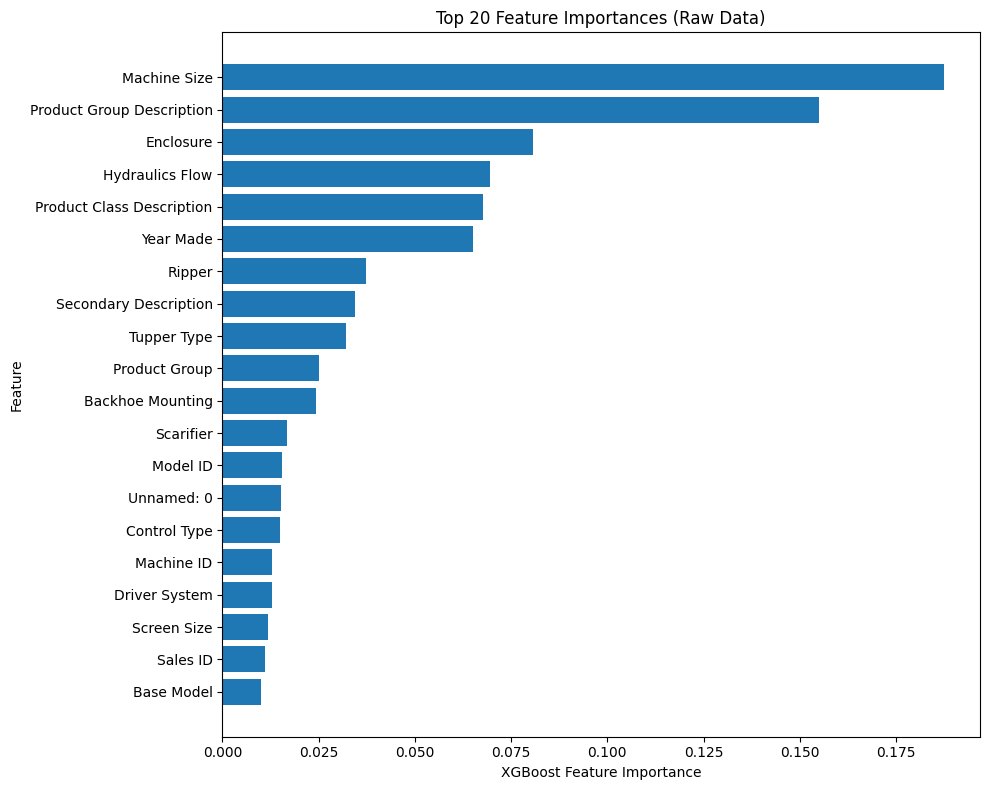

In [ ]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

df_xgb = pd.read_csv('data/raw/BIT_AI_assignment_data.csv')

# 1. Drop ID columns

# 2. Separate target variable (y) and features (X)
y = df_xgb['Sales Price']
X = df_xgb.drop(columns=['Sales Price'])

# 3. Encode all 'object' type columns
for col in X.select_dtypes(include=['object']).columns:
    # Convert column to category type and get the codes
    # This automatically handles NaNs by assigning them -1
    X[col] = X[col].astype('category').cat.codes

# 4. Fit XGBRegressor
# XGBoost will automatically handle NaNs in the numeric columns
print("Fitting XGBRegressor...")
xgb_reg = xgb.XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
xgb_reg.fit(X, y)
print("Fit complete. Performance:", xgb_reg.score(X, y))

# 5. Get and Plot Feature Importances
importances = xgb_reg.feature_importances_
feature_names = X.columns

# Create a DataFrame for easier plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the top 20 features
plt.figure(figsize=(10, 8))
plt.barh(
    importance_df['Feature'].head(20),
    importance_df['Importance'].head(20)
)
plt.xlabel("XGBoost Feature Importance")
plt.ylabel("Feature")
plt.title("Top 20 Feature Importances (Raw Data)")
plt.gca().invert_yaxis() # Display most important at the top
plt.tight_layout()
plt.savefig('xgb_raw_feature_importance.png')

print("Feature importance plot saved as 'xgb_raw_feature_importance.png'")
print("\nTop 10 Features:")
print(importance_df.head(10))